In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.regularizers import l2


from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField
import warnings
import os

In [12]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

(0, 4)
(0, 4)
what
(2962, 30, 30, 5) (1317, 30, 30, 5) (2962,)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 21, 21, 64)        32064     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 17, 17, 32)        51232     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 15, 15, 16)        4624      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 8)           0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 6, 6, 8)           0         
________________________________________________________

/Users/minujung/Desktop/Projects/cnn_stock_prediction/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/Users/minujung/Desktop/Projects/cnn_stock_prediction/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


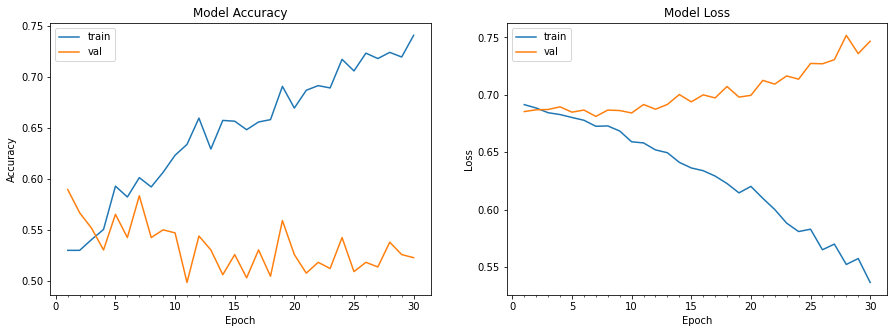

In [33]:
#X = np.stack((X_gadf, X_gasf, X_mtf), axis = 3)
y = np.loadtxt('./Data/Grammian3/labels')
X = np.load('./Data/Grammian3/X_tot.npy')

X_nan = np.argwhere(np.isnan(X))
print(X_nan.shape)
for i in range(X_nan.shape[0]):
    X[X_nan[i]] = 0
print(np.argwhere(np.isnan(X)).shape)
print('what')
#X = X[:, :, :, 0:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, shuffle = False)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train , test_size=0.333, shuffle = False)
print(X.shape, X_train.shape, y.shape)
balanced = False
if balanced:
    X_up, y_up = X_train[np.where(y_train == 1.0)[0]], y_train[np.where(y_train == 1.0)[0]]
    X_down, y_down = X_train[np.where(y_train == 0.0)[0]], y_train[np.where(y_train == 0.0)[0]]
    
    X_train = np.append(X_up, X_down[0:1000], axis = 0)
    y_train = np.append(y_up, y_down[0:1000])

'''model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape= (30,30,5), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))'''

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=10, activation='relu', input_shape=(30,30,5)))

model.add(Conv2D(32, kernel_size=5, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
#compile model using accuracy to measure model performance
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=30)
plot_model_history(history)



In [32]:
#print(predictions.shape, (predictions >= threshold).shape, np.array([y_test]).T.shape)
threshold = 0.55
predictions = model.predict(X_test)
preds = predictions[:][predictions >= threshold]
actuals = np.array([y_test]).T[predictions >= threshold]
from sklearn.metrics import accuracy_score
print ('Accuracy on higher threshold:', accuracy_score(actuals,[1 if x > threshold else 0 for x in preds]))
print('Returns:',len(actuals))

Accuracy on higher threshold: 0.4807692307692308
Returns: 52


Epoch 1/10
136/136 [==============================] - 75s 551ms/step - loss: 0.6695 - accuracy: 0.6103 - val_loss: 0.6955 - val_accuracy: 0.5708
Epoch 2/10
136/136 [==============================] - 77s 565ms/step - loss: 0.6674 - accuracy: 0.6122 - val_loss: 0.6840 - val_accuracy: 0.5708
Epoch 3/10
136/136 [==============================] - 77s 567ms/step - loss: 0.6668 - accuracy: 0.6127 - val_loss: 0.6812 - val_accuracy: 0.5708
Epoch 4/10
136/136 [==============================] - 78s 572ms/step - loss: 0.6662 - accuracy: 0.6131 - val_loss: 0.6811 - val_accuracy: 0.5694
Epoch 5/10
136/136 [==============================] - 79s 580ms/step - loss: 0.6643 - accuracy: 0.6124 - val_loss: 0.6893 - val_accuracy: 0.5708
Epoch 6/10
136/136 [==============================] - 78s 571ms/step - loss: 0.6663 - accuracy: 0.6124 - val_loss: 0.6933 - val_accuracy: 0.5708
Epoch 7/10
136/136 [==============================] - 78s 574ms/step - loss: 0.6644 - accuracy: 0.6136 - val_loss: 0.6886 - val_ac

/Users/minujung/Desktop/Projects/cnn_stock_prediction/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/Users/minujung/Desktop/Projects/cnn_stock_prediction/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


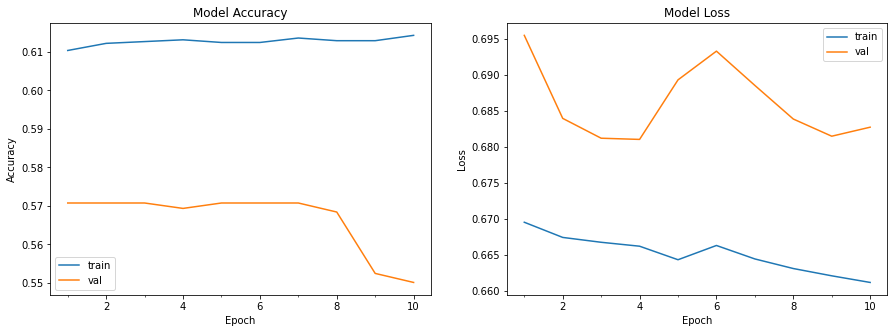

In [25]:
from keras.layers import *
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50

CLASS_COUNT = 1

base_model = ResNet50(
    weights='imagenet',
    include_top=False, 
    input_shape=(40, 40, 3), 
    pooling='avg',
)
base_model.trainable = False

model = Sequential([
  base_model,
  Dense(CLASS_COUNT, activation='sigmoid'),
])

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=10)
plot_model_history(history)

In [18]:
from sklearn.metrics import classification_report
#np.load('./Data/Grammian/X_tot.npy')
score = model.evaluate(X_test, y_test, verbose=1)
y_pred = model.predict(X_test)
y_test = y_test.astype(int)
y_test_ = []
y_pred_ = []
for n, i in enumerate(y_pred):
    #y_pred[n] = 1 if i > 0.5 else 0 
    if i > 0.5:
        y_test_.append(y_test[n])
        y_pred_.append(1)
    else:
        y_test_.append(y_test[n])
        y_pred_.append(0)

print(classification_report(y_test_, y_pred_))


100/100 [==============================] - 7s 74ms/step - loss: 0.6880 - true_positives: 283.0000 - accuracy: 0.5529
              precision    recall  f1-score   support

           0       0.60      0.77      0.67      1911
           1       0.40      0.22      0.28      1274

    accuracy                           0.55      3185
   macro avg       0.50      0.50      0.48      3185
weighted avg       0.52      0.55      0.52      3185

